Hace falta algo que indique con qué entorno vamos a trabajar

Importar lo que hace falta

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 

In [2]:
data_url = "../Data/properatti.csv"

In [3]:
data = pd.read_csv(data_url, encoding="utf-8")

In [4]:
# suprimo las observaciones que no tiene precio en dólares
data = data.dropna(axis=0, how='any', subset=['price_aprox_usd'])

---

Limpieza del dataset

---

In [5]:
data['state_name'].value_counts()

Capital Federal                 29018
Bs.As. G.B.A. Zona Norte        24058
Bs.As. G.B.A. Zona Sur          12085
Buenos Aires Costa Atlántica     9059
Córdoba                          9038
Bs.As. G.B.A. Zona Oeste         7333
Santa Fe                         5413
Buenos Aires Interior            1814
Mendoza                           476
Corrientes                        470
Río Negro                         361
Misiones                          348
Neuquén                           324
Tucumán                           213
San Luis                          208
Chubut                            164
Entre Ríos                        130
Salta                             102
Chaco                              36
La Pampa                           36
Tierra Del Fuego                   31
Formosa                            29
Catamarca                          26
Santa Cruz                         19
Jujuy                              10
San Juan                            4
Santiago Del

In [6]:
# determino el "peso" de los primeros estados, más del 90% de los datos
rows = 8
sum(data['state_name'].value_counts()[ :rows ])/data.shape[0]

0.9703204047217538

In [7]:
# necesito una lista con los primeros estados
states = data['state_name'].value_counts().index[ :rows ]

In [8]:
states

Index(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Córdoba', 'Bs.As. G.B.A. Zona Oeste',
       'Santa Fe', 'Buenos Aires Interior'],
      dtype='object')

In [9]:
# imputo np:NaN a todos los estados que no están en la lista de los primeros estados
data['state_name'] = data['state_name'].apply( lambda x : x if x in states else np.NaN )

In [10]:
# no necesito estas variables
del states
del rows

In [11]:
# suprimo las observaciones que no me sirven
data = data.dropna(axis=0, how='any', subset=['state_name'])

In [12]:
# me queda un dataset con ...
data.shape

(97818, 26)

---

In [13]:
data['place_name'].value_counts()

Córdoba                    6916
Mar del Plata              5966
Rosario                    4735
Tigre                      3038
Nordelta                   2885
                           ... 
Suipacha                      1
Country Golf El Sosiego       1
Río Segundo                   1
El Canton Barrio Norte        1
Altos de Hudson I             1
Name: place_name, Length: 829, dtype: int64

In [14]:
# determino el "peso" de los primeros "lugares" o "zonas", más del 90% de los datos
rows = 200
sum(data['place_name'].value_counts()[ :rows ])/data.shape[0]

0.9431495225827558

In [15]:
# necesito una lista con los primeros lugares
places = data['place_name'].value_counts().index[ :rows ]

In [16]:
places

Index(['Córdoba', 'Mar del Plata', 'Rosario', 'Tigre', 'Nordelta', 'Belgrano',
       'Palermo', 'Caballito', 'Pilar', 'La Plata',
       ...
       'Francisco Alvarez', 'Parque Leloir', 'Mendiolaza', 'Versalles',
       'Plaza Colón', 'Valeria del Mar', 'Florida Oeste', 'Loma Verde',
       'Mar de las Pampas', 'Villa General Mitre'],
      dtype='object', length=200)

In [17]:
# imputo np:NaN a todos los lugares que no están en la lista de los primeros lugares
data['place_name'] = data['place_name'].apply( lambda x : x if x in places else np.NaN )

In [18]:
# no necesito estas variables
del places
del rows

In [19]:
# suprimo las observaciones que no me sirven
data = data.dropna(axis=0, how='any', subset=['place_name'])

In [20]:
# me queda un dataset con ...
data.shape

(92257, 26)

---

In [21]:
#funcion para borrar outliers.
def borrar_outliers(data, columnas):
    """Solo recibo columnas con valores numericos. 
    Las columns van en forma de tupla"""
    cols_limpiar = columnas
    mask=np.ones(shape=(data.shape[0]), dtype=bool)

    for i in cols_limpiar:
        
        #calculamos cuartiles, y valores de corte
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)
        RSI=Q3-Q1
        max_value=Q3+1.5*RSI
        min_value=Q1-1.5*RSI
        
        #ajusto el min value a mano... no puede ser negativo.
        min_value=max(min_value, data[i].quantile(0.05))
        
        #filtramos por max y min
        mask=np.logical_and(mask, np.logical_and(data[i]>=min_value, data[i]<=max_value))
    return data[mask]

In [22]:
#hacemos las iteraciones para place y para tipo.
iterar_place = data['place_name'].value_counts()
iterar_place = iterar_place.index

iterar_tipo = data['property_type'].value_counts()
iterar_tipo = iterar_tipo.index

In [23]:
# serie para determinar observaciones sin outliers para precio en dólares y superficie cubierta
data['tidy1'] = np.NaN

for tipo in iterar_tipo:
    for place in iterar_place:
        # selecciono por lugar y tipo
        mask = np.logical_and(data['place_name']==place, data['property_type']==tipo)
        # calcula outliers y los suprime
        data_ok = borrar_outliers(data[mask], ('price_aprox_usd', 'surface_covered_in_m2'))
        # determina observaciones válidas
        data.loc[data_ok.index, 'tidy1'] = True

# probablemente esto se pueda hacer con algún método de pandas pero me resulta más simple pensarlo de este modo


In [24]:
# suprimo las observaciones que no me sirven
data = data.dropna(axis=0, how='any', subset=['tidy1'])

In [25]:
# me queda un dataset con ...
data.shape

(67467, 27)

---

Dummies según place_name

Esto es solo para mostrar que se puede hacer con mucha facilidad (en este TP no se pide)

---

In [26]:
place_dummies = pd.get_dummies(data = data['place_name'], prefix = 'place_')

In [27]:
place_dummies

,place__Abasto,place__Acassuso,place__Adrogué,place__Almagro,place__Avellaneda,place__Bahía Blanca,place__Balvanera,place__Banfield,place__Barracas,place__Barrio La Alameda,...,place__Villa Madero,place__Villa Martelli,place__Villa Ortuzar,place__Villa Pueyrredón,place__Villa Rosa,place__Villa Santa Rita,place__Villa Sarmiento,place__Villa Urquiza,place__Villa del Parque,place__Wilde
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
121218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

Check graficos sin tener que volver a eliminar outliers

---

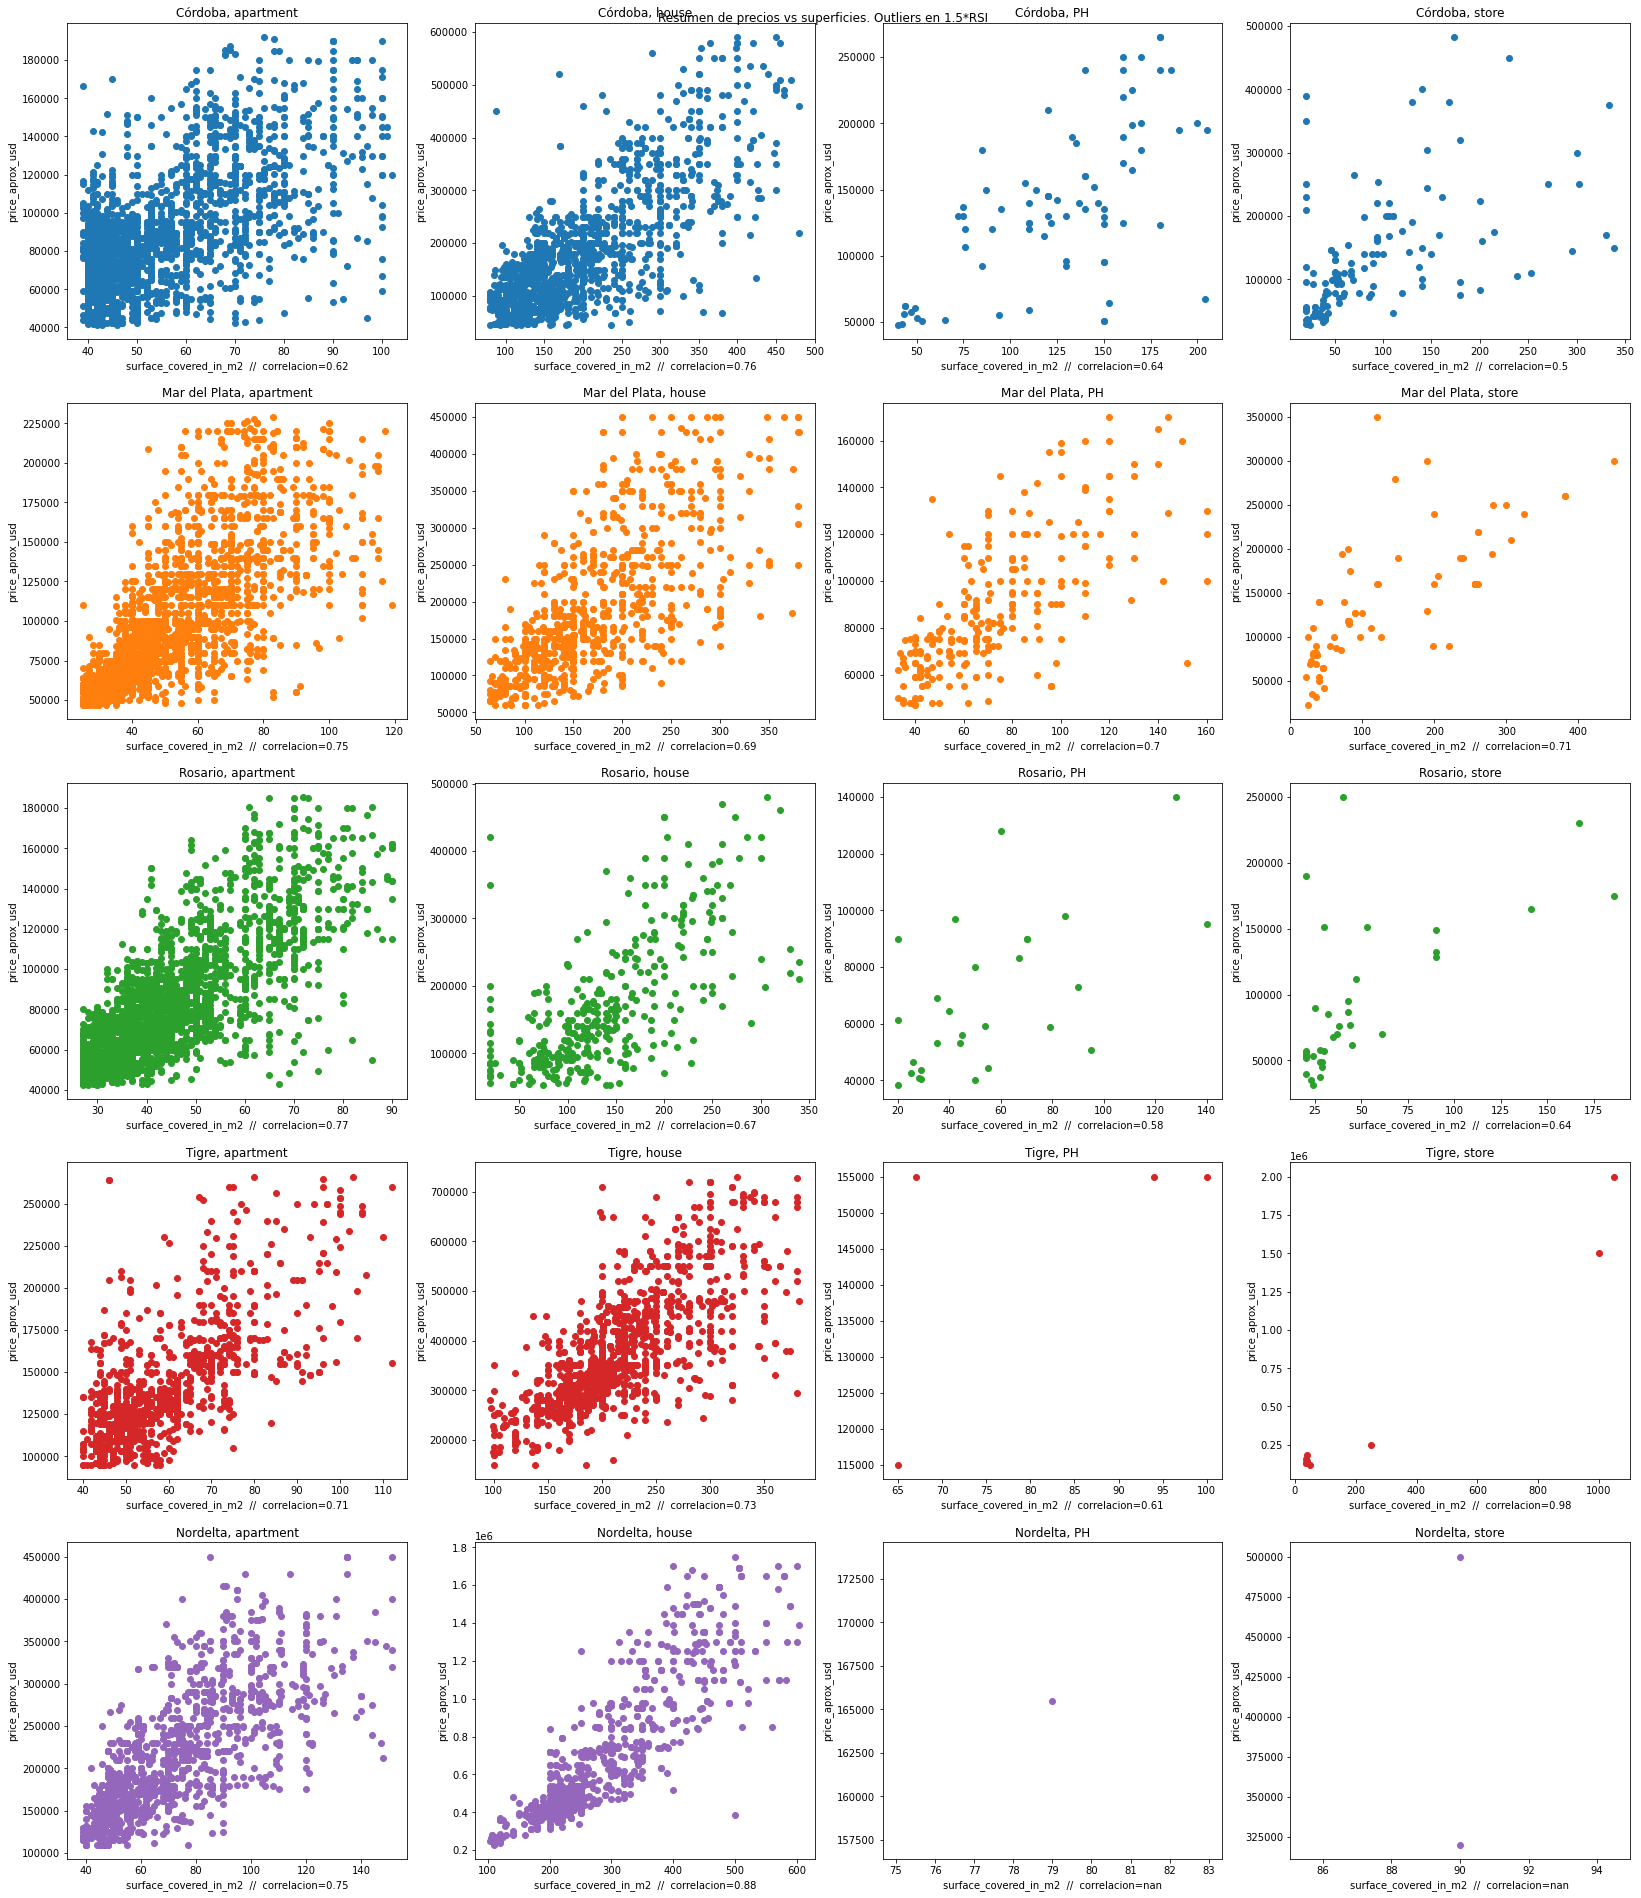

In [28]:
#Vamos a plotear, separando por groupby el data_clean

#levanto el subplot

len_tipo=len(iterar_tipo)
len_place=len(iterar_place[:5])
fig, axs = plt.subplots(len_place,len_tipo, figsize=(7*len_tipo,6*len_place), facecolor=(1, 1, 1))

#mapa de colores para que diferenciar por place
color_map=('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
            '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
            '#bcbd22', '#17becf')

#esto es el titulo
fig.suptitle(t="Resumen de precios vs superficies. Outliers en 1.5*RSI")

#posicion relativa de los graficos, para que no se vean tan apretados.
fig.subplots_adjust(top=0.975)

#Un "j" para cada tipo
j=0 
for tipo in iterar_tipo :
    
    #Un "j" para cada place
    i=0
    for place in iterar_place[:5] :
        #agrupamos la data. filtrando por cada place.
        data_grouped = data.groupby(by = 'place_name').filter(lambda x: all(x['place_name']==place))

        #volvemos a agrupar la data. filtrando por cada tipo.
        data_grouped = data_grouped.groupby(by = 'property_type').filter(lambda x: all(x['property_type']==tipo))
        
        #calculo corr para meter en el grafico (si, esto no deberia estar aca... sacar, eventualmente)
        corr_grafico =  data_grouped[['surface_covered_in_m2', 'price_aprox_usd']].corr()
        corr_grafico =  corr_grafico.iloc[0,1]
        corr_grafico = round(corr_grafico, 2)

        #seteo las condiciones para cada axs[i,j]
        axs[i,j].set_title(f'{place}, {tipo}')
        axs[i,j].set_xlabel(f'surface_covered_in_m2  //  correlacion={corr_grafico}')
        axs[i,j].set_ylabel('price_aprox_usd')
        axs[i,j].scatter( x=data_grouped['surface_covered_in_m2'], y=data_grouped['price_aprox_usd'], c=color_map[i])

        #vamos al siguiente place. Muevo hacia abajo en el plot
        i+=1
    #vamos a siguiente tipo Muevo hacia la derecha en el plot
    j+=1